In [3]:
# Test Fastpitch checkpoints trained on OpenSLR > German Neutral TTS Dataset with pre-trained hifigan vocoder

In [1]:
# imports
from nemo.collections.tts.models import FastPitchModel
from nemo.collections.tts.models import HifiGanModel
import IPython.display as ipd
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import torch
import numpy as np

[NeMo W 2022-06-02 22:16:47 experimental:27] Module <class 'nemo.collections.nlp.data.language_modeling.megatron.megatron_batch_samplers.MegatronPretrainingRandomBatchSampler'> is experimental, not ready for production and is not fully supported. Use at your own risk.


In [2]:
# fastpitch_path="/akshita/r1_to_r2_baseFastpitch_SynMelGen/FastPitch--v_loss=0.6848-epoch=294-last.ckpt"
fastpitch_path="/tmp/FastPitch--v_loss=0.7020-epoch=999-last.ckpt"
hfg_ngc="tts_hifigan"
data_path="/github/datasets/openslr-95-german-neutral-tts/thorsten-de/wavs/"
seed=100

In [3]:
#test
test1 = "Man darf sich nicht von anderen entmutigen lassen."
test1_id = "2edfc39c95ef247c6e39c929d122f4cc"
#val
test2 = "Allergiker sollten einen Staubsauger mit Filter nehmen."
test2_id = "34c7692223011b6153e27ae82ec1a7ae"

In [4]:
# load models
spec_gen_model = FastPitchModel.load_from_checkpoint(checkpoint_path=fastpitch_path).eval().cuda()
vocoder_model = HifiGanModel.from_pretrained(hfg_ngc, strict=False).eval().cuda()


/tmp/FastPitch--v_loss=0.7020-epoch=999-last.ckpt None None True
[NeMo I 2022-06-02 22:16:47 tokenize_and_classify:87] Creating ClassifyFst grammars. This might take some time...


[NeMo W 2022-06-02 22:17:03 modelPT:148] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.torch.data.TTSDataset
      manifest_filepath: /Data/openslr-95-german-neutral-tts/thorsten-de/train_phonemes_manifest.json
      sample_rate: 22050
      sup_data_path: /Data/openslr-95-german-neutral-tts/thorsten-de/phonemes5/
      sup_data_types:
      - align_prior_matrix
      - pitch
      n_fft: 1024
      win_length: 1024
      hop_length: 256
      window: hann
      n_mels: 80
      lowfreq: 0
      highfreq: 8000
      max_duration: 14
      min_duration: 0.1
      ignore_file: null
      trim: false
      pitch_fmin: 65.40639132514966
      pitch_fmax: 2093.004522404789
      pitch_norm: true
      pitch_mean: 132.524658203125
      pitch_std: 37.389366149902344
    dataloader_params:
      drop_la

[NeMo I 2022-06-02 22:17:03 features:259] PADDING: 1
[NeMo I 2022-06-02 22:17:03 features:276] STFT using torch
[NeMo I 2022-06-02 22:17:04 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.9.0rc0/tts_hifigan/e6da322f0f7e7dcf3f1900a9229a7e69/tts_hifigan.nemo.
[NeMo I 2022-06-02 22:17:04 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.9.0rc0/tts_hifigan/e6da322f0f7e7dcf3f1900a9229a7e69/tts_hifigan.nemo
[NeMo I 2022-06-02 22:17:04 common:747] Instantiating model from pre-trained checkpoint


[NeMo W 2022-06-02 22:17:06 modelPT:148] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/train_finetune.txt
      min_duration: 0.75
      n_segments: 8192
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 64
      num_workers: 4
    
[NeMo W 2022-06-02 22:17:06 modelPT:155] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/val_finetune.txt
      min_duration: 3
      n_segments: 66150


[NeMo I 2022-06-02 22:17:06 features:259] PADDING: 0
[NeMo I 2022-06-02 22:17:06 features:276] STFT using torch


[NeMo W 2022-06-02 22:17:06 features:233] Using torch_stft is deprecated and has been removed. The values have been forcibly set to False for FilterbankFeatures and AudioToMelSpectrogramPreprocessor. Please set exact_pad to True as needed.


[NeMo I 2022-06-02 22:17:06 features:259] PADDING: 0
[NeMo I 2022-06-02 22:17:06 features:276] STFT using torch
[NeMo I 2022-06-02 22:17:07 save_restore_connector:209] Model HifiGanModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.9.0rc0/tts_hifigan/e6da322f0f7e7dcf3f1900a9229a7e69/tts_hifigan.nemo.


In [9]:
# run inference

with torch.no_grad():
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.enabled = True
    torch.backends.cudnn.benchmark = False
    parsed = spec_gen_model.parse(str_input=test1, normalize=True)
    spectrogram = spec_gen_model.generate_spectrogram(tokens=parsed)
    print(spectrogram.size()) # debug
#     audio = vocoder_model.convert_spectrogram_to_audio(spec=spectrogram, sigma=0.8, denoise=True)
    audio = vocoder_model.convert_spectrogram_to_audio(spec=spectrogram)

spectrogram = spectrogram.to('cpu').numpy()[0]
audio = audio.to('cpu').numpy()[0]
audio = audio / np.abs(audio).max()

torch.Size([1, 80, 259])


In [10]:
# generated audio
ipd.Audio(audio, rate=22050)

In [11]:
# original audio
ipd.Audio(data_path+test1_id+'.wav', rate=22050)

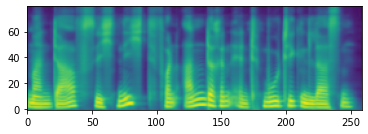

In [12]:
%matplotlib inline

# visualize the spectrogram

if spectrogram is not None:
    imshow(spectrogram, origin="lower")
    plt.show()

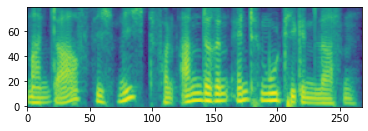

In [13]:
import matplotlib.pyplot as plt
import librosa

y, sr = librosa.load(data_path+test1_id+'.wav')
spectrogram2 = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, win_length=1024, hop_length=256)

imshow(np.log(spectrogram2)[ :80, :], origin="lower")
plt.show()

In [4]:
import json
input_manifest_filepath = "/github/datasets/openslr-95-german-neutral-tts/thorsten-de/train_manifest.json"
with open(input_manifest_filepath, "r") as f:
    for i, line in enumerate(f):
        d = json.loads(line)
        if d["normalized_text"] != d["text"]:
            print(d)

{'audio_filepath': '/github/datasets/openslr-95-german-neutral-tts/thorsten-de/wavs/69388f197e31fb599125a30c821ff743.wav', 'duration': 11.289977, 'text': 'Ich glaube, ganz  wichtig ist, dass wir von der Kita an bis in die Schulen hinein auch immer wieder die Übergänge gut gestalten, damit möglichst viele Schüler auch mitkommen.', 'normalized_text': 'Ich glaube, ganz wichtig ist, dass wir von der Kita an bis in die Schulen hinein auch immer wieder die Übergänge gut gestalten, damit möglichst viele Schüler auch mitkommen.'}
{'audio_filepath': '/github/datasets/openslr-95-german-neutral-tts/thorsten-de/wavs/f1becc89cb4079a123ead68c9c8bb8ae.wav', 'duration': 7.250023, 'text': 'Öffne den Webbrowser und rufe www.archlinux.org auf.', 'normalized_text': 'Öffne den Webbrowser und rufe w w w punkt a r c h l i n u x punkt o r g auf.'}
